<a href="https://colab.research.google.com/github/WidyaIn/MACHINE_LEARNING-SEM-5/blob/main/modul02_praktikum4_pertemuan%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 4


# Langkah 0 - Instal Pillow

In [10]:
!pip install Pillow

**PENJELASAN :** menginstall library pillow

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.jpg to Lenna.jpg


In [12]:
from PIL import Image

# Baca dan tampilkan gambar 'Lenna.jpg' dari direktori saat ini
img = Image.open('Lenna.jpg')
img.show()

**PENJELASAN :  **kode diatas digunakan untuk membaca gambar lenna yang telah di upload sebelumnya

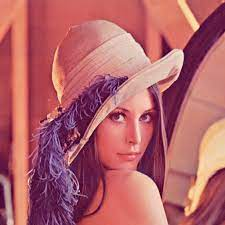

In [13]:
display(img)






# TUGAS PRAKTIKUM

# LANGKAH 1 : IMPORT DATASET

In [15]:
from google.colab import files
uploaded = files.upload()

Saving wbc.csv to wbc.csv


**PENJELASAN : **langkah pertama yaitu upload dataset yang telah tertera pada jobsheet. Disini upload dataset wbc

In [25]:
import pandas as pd
import io

dpath = 'data/wbc.csv'
df = pd.read_csv(io.BytesIO(uploaded['wbc.csv']))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**PENJELASAN :** Membaca data di dalam dataset wbc serta menampilkan 5 data pertamanya

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**PENJELASAN :** menampilkan informasi data null, kolom dan type data serta memory yang terpakai di dalam dataset wbc

In [27]:
# import pandas as pd
# Baca data dari file CSV
data = pd.read_csv('wbc.csv')

# Pisahkan variabel yang dapat digunakan (numeric) dan yang tidak dapat digunakan
numeric_columns = data.select_dtypes(include=['number'])
non_numeric_columns = data.select_dtypes(exclude=['number'])

# Menampilkan daftar kolom yang tidak dapat digunakan
print("Variabel yang tidak dapat digunakan:")
print(non_numeric_columns)

# Menampilkan beberapa baris pertama dari DataFrame yang hanya berisi kolom numerik
print("DataFrame dengan hanya kolom numerik:")
print(numeric_columns.head())

Variabel yang tidak dapat digunakan:
    diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]
DataFrame dengan hanya kolom numerik:
         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3         

**PENJELASAN :** Menampilkan variabel dari datasset wbc yang variabelnya dapat digunakan dan tidak dapat digunakan

2. Lakukan proses encoding pada kolom "diagnosis".


Proses encoding kolom diagnosis

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # membuat objek dari LabelEncoder
df['diagnosis'] = le.fit_transform(df['diagnosis']) # proses encoding pada kolom diagnosis
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**PENJELASAN :** Hasil encoder tersebut menampilkan data dalam kolom diagnosis setelah di encoding. Dapat dilihat pada kolom diagnosis yang awalnya bernilai M, berubah menjadi 1. Dikarenakan adanya proses encoding

3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.

In [29]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler() #membuat objek dari kelas StandardScaler dan dapat
# menyimpan nilai pada variabel std
# Standarisasi kolom numerik
data[numeric_columns.columns] = std.fit_transform(data[numeric_columns.columns])
#melakukan standarisasi pada seluruh kolom yang memiliki numerik (numeric_columns.columns)
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,-0.236405,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,-0.236403,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,0.431741,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,0.432121,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,0.432201,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN


**PENJELASAN :** pada kode diatas melakukan standarisasi pada kolom-kolom pada dataset wbc yang memiliki nilai numerik dan ditampilkan dengan hasil seperti diatas. Bisa dilihat bahwa kolom diagnosis yang sebelumnya sudah di encoding menjadi 1 tidak ikut berubah, karena pada perintah di step ini memang hanya data yang memuliki nilai numerik saja yang di standarisasi kan. Maka tidak mengubah nilai pada kolom yang tidak memiliki nilai numerik seperti diagnosis.

4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [32]:
# Split data
from sklearn.model_selection import train_test_split

# Rasio yang akan digunakan adalah 8:1:1
df_train, df_test = train_test_split(df, test_size=0.2,  stratify=df['diagnosis'], random_state=0)


print(f'Jumlah label data asli:\n{df.diagnosis.value_counts()}')
print(f'Jumlah label data train:\n{df_train.diagnosis.value_counts()}')
print(f'Jumlah label data test:\n{df_test.diagnosis.value_counts()}')

Jumlah label data asli:
0    357
1    212
Name: diagnosis, dtype: int64
Jumlah label data train:
0    285
1    170
Name: diagnosis, dtype: int64
Jumlah label data test:
0    72
1    42
Name: diagnosis, dtype: int64
